<a href="https://colab.research.google.com/github/Liberatofco/MineriaDatos/blob/main/Mineria_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  from google.colab import drive
  drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
capitulosop = pd.read_csv("/content/drive/MyDrive/Mineria de datos/Chapters.csv", encoding='ISO-8859-1')
capitulosop

,Chapter_Number,Volume,Name,Romanized_title,Viz_title,Pages,Date,Episodes
0,1,1,Romance Dawn - The Dawn of the Adventure,Romansu Don - Boken no Yoake,Romance Dawn,53.0,"July 19, 1997",1997 Issue
1,2,1,"That Guy, ""Straw Hat Luffy""","Sono Otoko ""Mugiwara no Rufi""","They Call Him ""Straw Hat Luffy""",23.0,"July 28, 1997",1997 Issue
2,3,1,Introducing Pirate Hunter Zoro,"""Kaizoku-gari no Zoro"" Tojo",Enter Zolo: Pirate Hunter,21.0,"August 4, 1997",1997 Issue
3,4,1,"Marine Captain ""Axe-Hand Morgan""","Kaigun Taisa ""Onote no Mogan""",The Great Captain Morgan,19.0,"August 11, 1997",1997 Issue 37-
4,5,1,Pirate King and Master Swordsman,Kaizoku-O to Daikengo,The King of the Pirates and the Master Swordsman,19.0,"August 25, 1997",1997 Issue
...,...,...,...,...,...,...,...,...
1008,1009,100,Naraku,Naraku,Naraku,19.0,"April 5, 2021",2021 Issue
1009,1010,100,Haoshoku,Hao-shoku,Color of the Supreme King,17.0,"April 12, 2021",2021 Issue
1010,1011,100,The Code of Anko,Anko no Jingi,The Code of Sweet Beans,19.0,"April 26, 2021",2021 Issue 21-
1011,1012,100,Itch,Uzu,Itch,15.0,"May 10, 2021",2021 Issue


# Limpieza de datos


In [4]:
capitulosop.columns = ['Numero_capitulo','Volumen','Nombre', 'Titulo_romanji', 'Titulo_viz', 'Paginas', 'Fecha', 'Episodios']
capitulosop['Fecha'] = pd.to_datetime(capitulosop['Fecha'])
capitulosop['Anio'] = capitulosop['Fecha'].dt.year
capitulosop.dtypes

Numero_capitulo             int64
Volumen                     int64
Nombre                     object
Titulo_romanji             object
Titulo_viz                 object
Paginas                   float64
Fecha              datetime64[ns]
Episodios                  object
Anio                        int64
dtype: object

In [5]:
print(capitulosop.isnull().sum ())

Numero_capitulo    0
Volumen            0
Nombre             0
Titulo_romanji     0
Titulo_viz         0
Paginas            1
Fecha              0
Episodios          0
Anio               0
dtype: int64


In [6]:
print(capitulosop.loc[capitulosop['Paginas'].isnull()])

    Numero_capitulo  Volumen Nombre Titulo_romanji Titulo_viz  Paginas  \
11               12        2    Dog            Inu        Dog      NaN   

        Fecha    Episodios  Anio  
11 1997-10-13  1997 Issue   1997  


In [7]:
capitulosop.loc[11, 'Paginas'] = 21.0
capitulosop['Paginas'] = capitulosop['Paginas'].astype(int)
capitulosop.head(12)

,Numero_capitulo,Volumen,Nombre,Titulo_romanji,Titulo_viz,Paginas,Fecha,Episodios,Anio
0,1,1,Romance Dawn - The Dawn of the Adventure,Romansu Don - Boken no Yoake,Romance Dawn,53,1997-07-19,1997 Issue,1997
1,2,1,"That Guy, ""Straw Hat Luffy""","Sono Otoko ""Mugiwara no Rufi""","They Call Him ""Straw Hat Luffy""",23,1997-07-28,1997 Issue,1997
2,3,1,Introducing Pirate Hunter Zoro,"""Kaizoku-gari no Zoro"" Tojo",Enter Zolo: Pirate Hunter,21,1997-08-04,1997 Issue,1997
3,4,1,"Marine Captain ""Axe-Hand Morgan""","Kaigun Taisa ""Onote no Mogan""",The Great Captain Morgan,19,1997-08-11,1997 Issue 37-,1997
4,5,1,Pirate King and Master Swordsman,Kaizoku-O to Daikengo,The King of the Pirates and the Master Swordsman,19,1997-08-25,1997 Issue,1997
5,6,1,The First,Hitorime,Number One,23,1997-09-01,1997 Issue,1997
6,7,1,Friends,Tomodachi,Friends,20,1997-09-08,1997 Issue,1997
7,8,1,Introducing Nami,Nami Tojo,Nami,19,1997-09-15,1997 Issue,1997
8,9,2,The Devil Girl,Masho no Onna,Femme Fatale,21,1997-09-22,1997 Issue,1997
9,10,2,Incident at the Tavern,Sakaba no Ikken,Incident at the Tavern,23,1997-09-29,1997 Issue,1997


In [8]:
capitulosop.to_csv("/content/drive/MyDrive/Mineria de datos/onepiece_chapters_modificado.csv", index=False)

In [9]:
capitulosop.dtypes

Numero_capitulo             int64
Volumen                     int64
Nombre                     object
Titulo_romanji             object
Titulo_viz                 object
Paginas                     int64
Fecha              datetime64[ns]
Episodios                  object
Anio                        int64
dtype: object

In [10]:
capitulosop.head(40)

,Numero_capitulo,Volumen,Nombre,Titulo_romanji,Titulo_viz,Paginas,Fecha,Episodios,Anio
0,1,1,Romance Dawn - The Dawn of the Adventure,Romansu Don - Boken no Yoake,Romance Dawn,53,1997-07-19,1997 Issue,1997
1,2,1,"That Guy, ""Straw Hat Luffy""","Sono Otoko ""Mugiwara no Rufi""","They Call Him ""Straw Hat Luffy""",23,1997-07-28,1997 Issue,1997
2,3,1,Introducing Pirate Hunter Zoro,"""Kaizoku-gari no Zoro"" Tojo",Enter Zolo: Pirate Hunter,21,1997-08-04,1997 Issue,1997
3,4,1,"Marine Captain ""Axe-Hand Morgan""","Kaigun Taisa ""Onote no Mogan""",The Great Captain Morgan,19,1997-08-11,1997 Issue 37-,1997
4,5,1,Pirate King and Master Swordsman,Kaizoku-O to Daikengo,The King of the Pirates and the Master Swordsman,19,1997-08-25,1997 Issue,1997
5,6,1,The First,Hitorime,Number One,23,1997-09-01,1997 Issue,1997
6,7,1,Friends,Tomodachi,Friends,20,1997-09-08,1997 Issue,1997
7,8,1,Introducing Nami,Nami Tojo,Nami,19,1997-09-15,1997 Issue,1997
8,9,2,The Devil Girl,Masho no Onna,Femme Fatale,21,1997-09-22,1997 Issue,1997
9,10,2,Incident at the Tavern,Sakaba no Ikken,Incident at the Tavern,23,1997-09-29,1997 Issue,1997


# Estadistica Descriptiva

In [11]:
# Funciones de Agregacion

In [12]:
datos_por_tomo = capitulosop.groupby('Volumen')['Paginas'].sum()
datos_por_tomo_media = capitulosop.groupby('Volumen')['Paginas'].mean().sort_values(ascending=False)
datos_por_tomo_minima = capitulosop.groupby('Volumen')['Paginas'].min().sort_values(ascending=False)
datos_por_tomo_maxima = capitulosop.groupby('Volumen')['Paginas'].max().sort_values(ascending=False)
tabla_estadisticas = pd.concat([datos_por_tomo, datos_por_tomo_media, datos_por_tomo_maxima, datos_por_tomo_minima], axis=1)
tabla_estadisticas.columns = ['Paginas', 'Paginas Promedio', 'Maxima Paginas', 'Minima Paginas']


tabla_estadisticas.head (100)


,Paginas,Paginas Promedio,Maxima Paginas,Minima Paginas
Volumen,,,,
1,197,24.625000,53,19
2,178,19.777778,23,17
3,181,20.111111,29,19
4,175,19.444444,21,19
5,174,19.333333,21,18
...,...,...,...,...
96,174,17.400000,19,17
97,174,17.400000,19,17
98,174,17.400000,19,15


# Visualizacion de datos

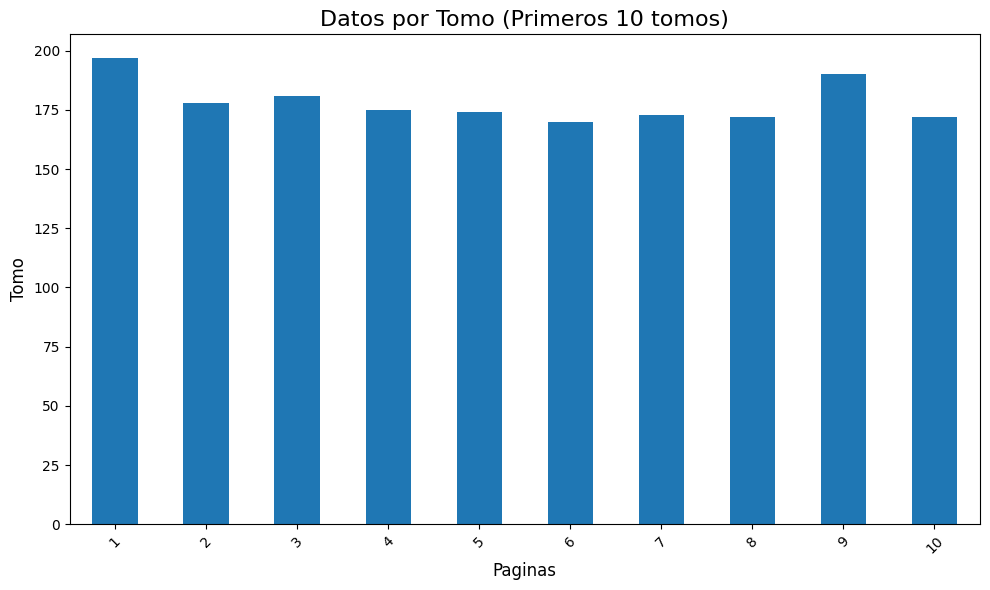

In [13]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))  

# Obtener los primeros 10 registros y graficarlos como un gráfico de barras
datos_por_tomo.head(10).plot.bar(ax=ax)

plt.title('Datos por Tomo (Primeros 10 tomos)', fontsize=16)  # Ajusta el tamaño de la fuente del título
plt.xlabel('Paginas', fontsize=12)  # Ajusta el tamaño de la fuente del eje x
plt.ylabel('Tomo', fontsize=12)  # Ajusta el tamaño de la fuente del eje y

# Ajustar la rotación de las etiquetas del eje x
plt.xticks(rotation=45)  

plt.tight_layout()  # Ajusta el espacio entre los elementos del gráfico
plt.show()

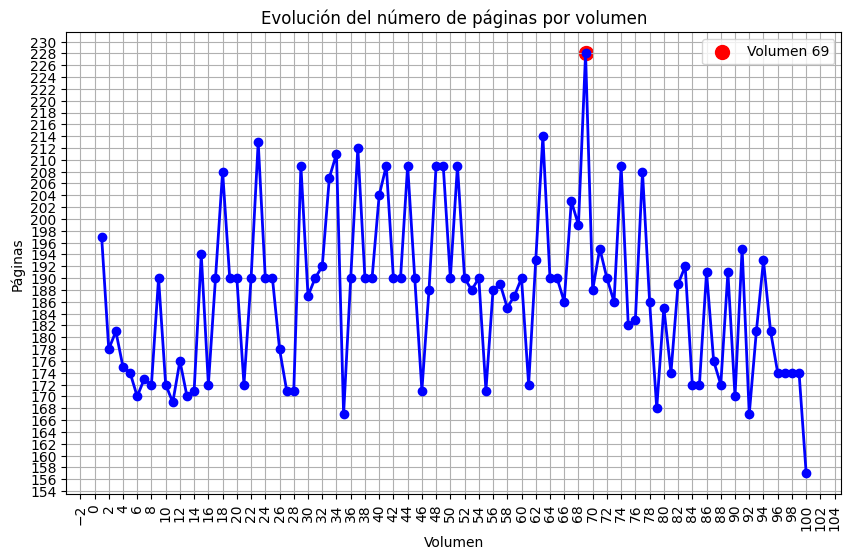

In [14]:
datos_por_tomo = capitulosop.groupby('Volumen')['Paginas'].sum()

plt.figure(figsize=(10, 6))
plt.plot(datos_por_tomo.index, datos_por_tomo.values, marker='o', color='blue', linewidth=2)

volumen_pico_maximo = datos_por_tomo.idxmax()
numero_paginas_pico_maximo = datos_por_tomo.max()

plt.scatter(volumen_pico_maximo, numero_paginas_pico_maximo, color='red', s=100, label='Volumen {}'.format(volumen_pico_maximo))

plt.xlabel('Volumen')
plt.ylabel('Páginas')
plt.title('Evolución del número de páginas por volumen')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()

# Ajusta el tamaño de fuente en el eje y y establece los ticks en incrementos de 2
plt.tick_params(axis='y', labelsize=10)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))

# Establece los ticks en el eje x en incrementos de 2
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.show()

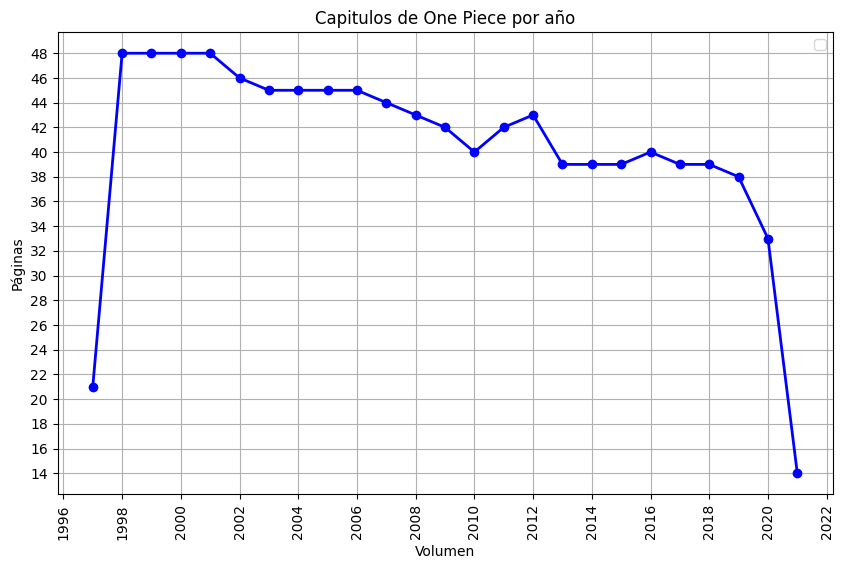

In [15]:
capitulos_por_año = capitulosop.groupby('Anio')['Numero_capitulo'].count()

plt.figure(figsize=(10, 6))
plt.plot(capitulos_por_año .index, capitulos_por_año .values, marker='o', color='blue', linewidth=2)

volumen_pico_maximo = capitulos_por_año .idxmax()
numero_paginas_pico_maximo = capitulos_por_año .max()


plt.xlabel('Volumen')
plt.ylabel('Páginas')
plt.title('Capitulos de One Piece por año')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()

# Ajusta el tamaño de fuente en el eje y y establece los ticks en incrementos de 2
plt.tick_params(axis='y', labelsize=10)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))

# Establece los ticks en el eje x en incrementos de 2
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.show()

# Pruebas Estadisticas

In [16]:
print(capitulosop.columns)

Index(['Numero_capitulo', 'Volumen', 'Nombre', 'Titulo_romanji', 'Titulo_viz',
       'Paginas', 'Fecha', 'Episodios', 'Anio'],
      dtype='object')


In [17]:


# se agrego una nueva columna para poder trabajar con pruebas

# Definir los rangos de capítulos para cada saga argumental
sagas_argumentales = ['Saga del East Blue', 'Saga de Arabasta', 'Saga de la isla del Cielo', 'Saga de Water 7',
                      'Saga de Thriller Bark', 'Saga de la Guerra en la Cumbre', 'Saga de la isla Gyojin',
                      'Saga de Dressrosa', 'Saga de Whole Cake Island', 'Saga del País de Wano']

rangos_capitulos = {
    range(1, 100): 'Saga del East Blue',
    range(100, 218): 'Saga de Arabasta',
    range(218, 303): 'Saga de la isla del Cielo',
    range(303, 442): 'Saga de Water 7',
    range(442, 489): 'Saga de Thriller Bark',
    range(489, 598): 'Saga de la Guerra en la Cumbre',
    range(598, 655): 'Saga de la isla Gyojin',
    range(655, 802): 'Saga de Dressrosa',
    range(802, 909): 'Saga de Whole Cake Island',
    range(909, 1015): 'Saga del País de Wano'
}

# Crear una nueva columna 'Saga Argumental' en el DataFrame original
capitulosop['Saga Argumental'] = None

# Asignar las sagas correspondientes según los rangos de capítulos
for rango, saga in rangos_capitulos.items():
    capitulosop.loc[capitulosop['Numero_capitulo'].isin(rango), 'Saga Argumental'] = saga

# Mostrar el DataFrame completo con todas las columnas

# Guardar el DataFrame modificado 

capitulosop.to_csv("/content/drive/MyDrive/Mineria de datos/onepiece_chapters_modificado.csv", index=False)



In [18]:
capitulos_por_saga = capitulosop['Saga Argumental'].value_counts()
capitulos_por_saga

Saga de Dressrosa                 147
Saga de Water 7                   139
Saga de Arabasta                  118
Saga de la Guerra en la Cumbre    109
Saga de Whole Cake Island         107
Saga del País de Wano             105
Saga del East Blue                 99
Saga de la isla del Cielo          85
Saga de la isla Gyojin             57
Saga de Thriller Bark              47
Name: Saga Argumental, dtype: int64

In [19]:
import pandas as pd
from scipy.stats import f_oneway

# Definir las sagas argumentales y las muestras
sagas_argumentales = ['Saga del East Blue', 'Saga de Arabasta', 'Saga de la isla del Cielo', 'Saga de Water 7', 'Saga de Thriller Bark', 'Saga de la Guerra en la Cumbre', 'Saga de la isla Gyojin', 'Saga de Dressrosa', 'Saga de Whole Cake Island', 'Saga del País de Wano']
muestras = []

# Obtener la muestra de cada saga
for saga in sagas_argumentales:
    muestra = capitulosop.loc[capitulosop['Saga Argumental'] == saga, 'Numero_capitulo'].values
    muestras.append(muestra)

# Realizar la prueba ANOVA
resultado = f_oneway(*muestras)

# Imprimir los resultados
print("Resultados ANOVA:")
print("Estadística F:", resultado.statistic)
print("Valor p:", resultado.pvalue)


Resultados ANOVA:
Estadística F: 8762.149406981493
Valor p: 0.0


In [20]:
import statsmodels.stats.multicomp as mc

# Realizar la prueba de Tukey HSD
tukey_result = mc.MultiComparison(capitulosop['Numero_capitulo'], capitulosop['Saga Argumental']).tukeyhsd()

# Imprimir los resultados
print(tukey_result)


                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
            group1                         group2             meandiff p-adj   lower     upper   reject
-------------------------------------------------------------------------------------------------------
              Saga de Arabasta              Saga de Dressrosa    569.5   0.0  556.5922  582.4078   True
              Saga de Arabasta          Saga de Thriller Bark    306.5   0.0  288.4872  324.5128   True
              Saga de Arabasta                Saga de Water 7    213.5   0.0  200.4278  226.5722   True
              Saga de Arabasta      Saga de Whole Cake Island    696.5   0.0  682.5592  710.4408   True
              Saga de Arabasta Saga de la Guerra en la Cumbre    384.5   0.0  370.6264  398.3736   True
              Saga de Arabasta         Saga de la isla Gyojin    467.5   0.0   450.655   484.345   True
              Saga de Arabasta      Saga de la isla del Cielo   

# Modelos lineales

In [21]:
from sklearn.linear_model import LinearRegression

# Variables independientes (X) y variable dependiente (y)
X = capitulosop[['Numero_capitulo']]
y = capitulosop['Paginas']

# Crear una instancia del modelo de regresión lineal
regression_model = LinearRegression()

# Ajustar el modelo utilizando los datos
regression_model.fit(X, y)

# Realizar predicciones utilizando el modelo entrenado
y_pred = regression_model.predict(X)

# Imprimir los coeficientes y la intersección
print('Coeficientes:', regression_model.coef_)
print('Intersección:', regression_model.intercept_)


Coeficientes: [-0.00259472]
Intersección: 19.777514836766308


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


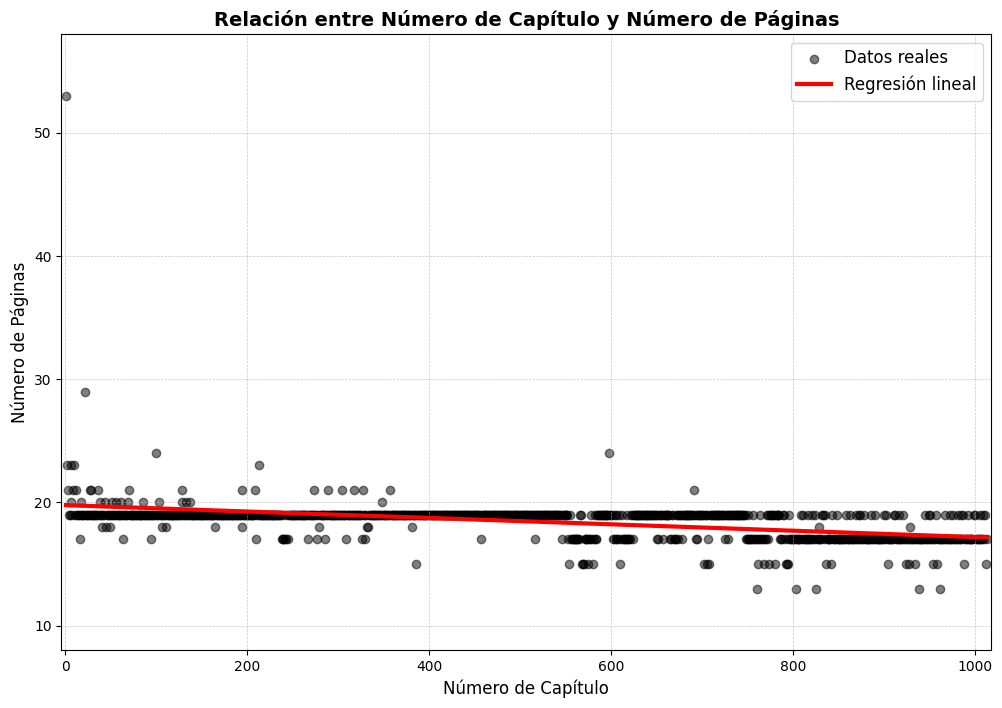

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Graficar los datos reales
plt.scatter(capitulosop['Numero_capitulo'], capitulosop['Paginas'], color='black', label='Datos reales', alpha=0.5)

# Generar puntos adicionales para la línea de regresión
X_line = np.linspace(capitulosop['Numero_capitulo'].min(), capitulosop['Numero_capitulo'].max(), 100)
y_line = regression_model.predict(X_line.reshape(-1, 1))

# Graficar la línea de regresión con más puntos
plt.plot(X_line, y_line, color='red', linewidth=3, label='Regresión lineal')

# Etiquetas de los ejes
plt.xlabel('Número de Capítulo', fontsize=12)
plt.ylabel('Número de Páginas', fontsize=12)

# Título del gráfico
plt.title('Relación entre Número de Capítulo y Número de Páginas', fontsize=14, fontweight='bold')

# Ajustar los límites de los ejes
plt.xlim(capitulosop['Numero_capitulo'].min() - 5, capitulosop['Numero_capitulo'].max() + 5)
plt.ylim(capitulosop['Paginas'].min() - 5, capitulosop['Paginas'].max() + 5)

# Agregar una cuadrícula
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()


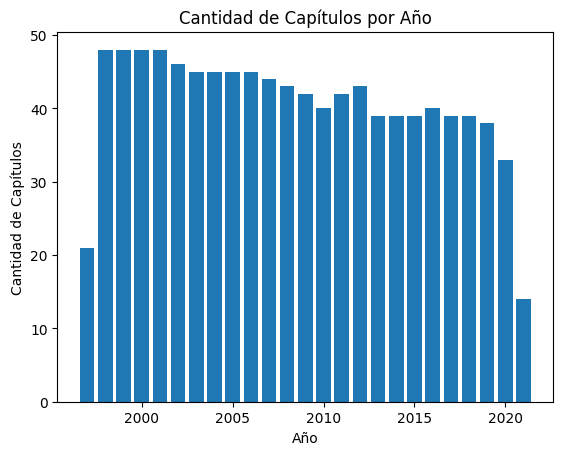

In [23]:
capitulos_por_anio = capitulosop.groupby('Anio')['Numero_capitulo'].count()

df_capitulos_por_anio = capitulos_por_anio.reset_index()
df_capitulos_por_anio.columns = ['Anio', 'Cantidad_capitulos']

plt.bar(df_capitulos_por_anio['Anio'], df_capitulos_por_anio['Cantidad_capitulos'])
plt.xlabel('Año')
plt.ylabel('Cantidad de Capítulos')
plt.title('Cantidad de Capítulos por Año')
plt.show()


In [24]:
from sklearn.linear_model import LinearRegression

# Variables independientes (X) y variable dependiente (y)
X = df_capitulos_por_anio[['Anio']]
y = df_capitulos_por_anio['Cantidad_capitulos']

# Crear una instancia del modelo de regresión lineal
regression_model = LinearRegression()

# Ajustar el modelo utilizando los datos
regression_model.fit(X, y)

# Realizar predicciones utilizando el modelo entrenado
y_pred = regression_model.predict(X)

# Imprimir los coeficientes y la intersección
print('Coeficientes:', regression_model.coef_)
print('Intersección:', regression_model.intercept_)


Coeficientes: [-0.49769231]
Intersección: 1040.383846153846


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


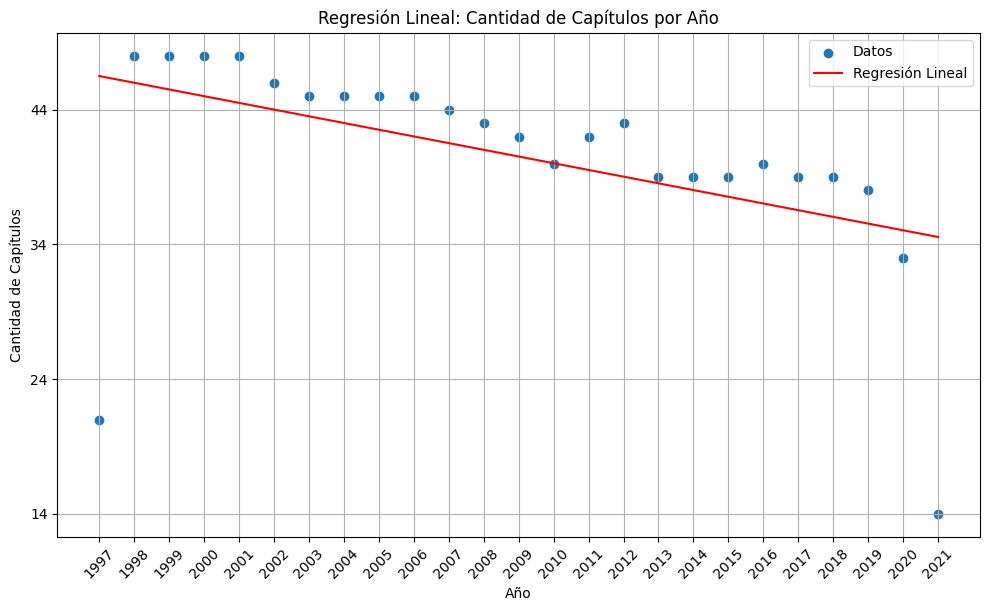

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Crear un rango de valores para X
X_range = np.linspace(min(X['Anio']), max(X['Anio']), 100)

# Realizar predicciones para el rango de valores de X
y_pred_range = regression_model.predict(X_range.reshape(-1, 1))

# Graficar los datos y la línea de regresión con más detalles
plt.figure(figsize=(10, 6))
plt.scatter(X['Anio'], y, label='Datos')
plt.plot(X_range, y_pred_range, color='red', label='Regresión Lineal')
plt.xlabel('Año')
plt.ylabel('Cantidad de Capítulos')
plt.title('Regresión Lineal: Cantidad de Capítulos por Año')
plt.legend()

# Personalizar los ejes
plt.xticks(np.arange(min(X['Anio']), max(X['Anio'])+1, 1))
plt.yticks(np.arange(min(y), max(y)+1, 10))

plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()


#Forecasting

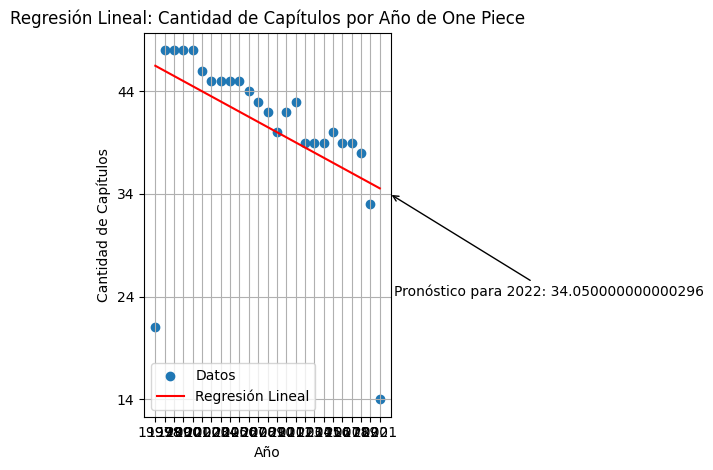

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los datos del DataFrame
X = df_capitulos_por_anio["Anio"].values
y = df_capitulos_por_anio["Cantidad_capitulos"].values

# Realizar la regresión lineal para obtener la pendiente y la interceptación
m, b = np.polyfit(X, y, 1)

# Calcular el pronóstico para un año específico
year = 2022
prediction = m * year + b

# Graficar los datos y la línea de regresión
plt.scatter(X, y, label='Datos')
plt.plot(X, m * X + b, color='red', label='Regresión Lineal')
plt.xlabel('Año')
plt.ylabel('Cantidad de Capítulos')
plt.title('Regresión Lineal: Cantidad de Capítulos por Año de One Piece')
plt.legend()

# Personalizar los ejes
plt.xticks(np.arange(min(X), max(X)+1, 1))
plt.yticks(np.arange(min(y), max(y)+1, 10))

# Agregar una cuadrícula
plt.grid(True)

# Mostrar el pronóstico en la gráfica
plt.annotate(f'Pronóstico para {year}: {prediction}', (year, prediction), xytext=(year + 0.5, prediction - 10), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()


Coeficientes: [-0.00259472]
Intersección: 19.777514836766308
Pronóstico de páginas: [16.96484323]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


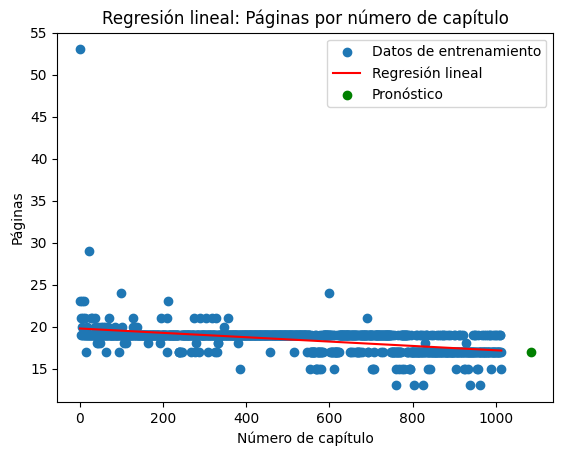

In [27]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Variables independientes (X) y variable dependiente (y)
X = capitulosop[['Numero_capitulo']]
y = capitulosop['Paginas']

# Crear una instancia del modelo de regresión lineal
regression_model = LinearRegression()

# Ajustar el modelo utilizando los datos
regression_model.fit(X, y)

# Realizar predicciones utilizando el modelo entrenado
y_pred = regression_model.predict(X)

# Imprimir los coeficientes y la intersección
print('Coeficientes:', regression_model.coef_)
print('Intersección:', regression_model.intercept_)
# Valor de Numero_capitulo para el pronóstico
nuevo_numero_capitulo = 1084

# Realizar el pronóstico
pronostico_paginas = regression_model.predict([[nuevo_numero_capitulo]])

print('Pronóstico de páginas:', pronostico_paginas)


# Graficar los datos de entrenamiento
plt.scatter(X, y, label='Datos de entrenamiento')

# Graficar la línea de regresión y las predicciones
plt.plot(X, y_pred, color='red', label='Regresión lineal')

# Graficar el pronóstico
plt.scatter(nuevo_numero_capitulo, pronostico_paginas, color='green', label='Pronóstico')

# Agregar etiquetas y título al gráfico
plt.xlabel('Número de capítulo')
plt.ylabel('Páginas')
plt.title('Regresión lineal: Páginas por número de capítulo')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Pronóstico para el año 2022: [1088.21523201]


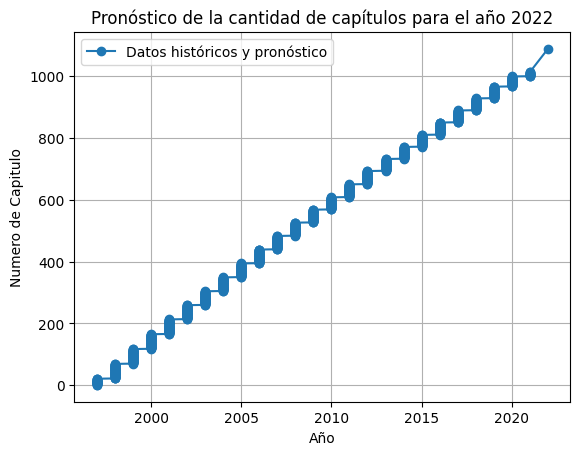

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filtrar los datos hasta el año 2021
datos_historicos = capitulosop[capitulosop['Anio'] <= 2021]

# Variables independientes (X) y variable dependiente (y)
X = datos_historicos[['Anio']]
y = datos_historicos[['Numero_capitulo']]

# Crear una instancia del modelo de regresión lineal
regresion = LinearRegression()

# Ajustar el modelo utilizando los datos
regresion.fit(X, y)

# Realizar la predicción para el año 2022
pronostico_2022 = regresion.predict([[2022]])

print("Pronóstico para el año 2022:", pronostico_2022[0])

# Crear un DataFrame con los datos históricos y el pronóstico
datos_grafico = pd.DataFrame({'Anio': datos_historicos['Anio'].values.tolist() + [2022],
                              'Numero_capitulo': datos_historicos['Numero_capitulo'].values.tolist() + [pronostico_2022[0]]})

# Graficar los datos históricos y el pronóstico
plt.plot(datos_grafico['Anio'], datos_grafico['Numero_capitulo'], marker='o', linestyle='-', label='Datos históricos y pronóstico')
plt.xlabel('Año')
plt.ylabel('Numero de Capitulo')
plt.title('Pronóstico de la cantidad de capítulos para el año 2022')
plt.legend()
plt.grid(True)
plt.show()


# Data clustering



<ipython-input-29-4af24b592124>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Saga Argumental"] = label_encoder.fit_transform(df_selected["Saga Argumental"])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-29-4af24b592124>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(labels))
<ipython-input-29-4af24b592124>:42: UserWarnin

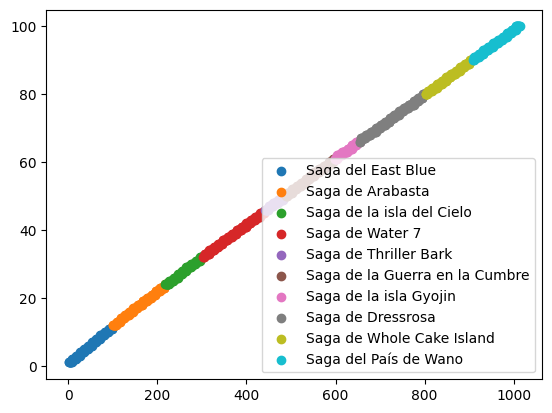

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Leer el archivo CSV y cargar el dataset
df = pd.read_csv("/content/drive/MyDrive/Mineria de datos/onepiece_chapters_modificado.csv")  
# Seleccionar las columnas relevantes para el algoritmo de k-means
columns = ["Numero_capitulo", "Volumen", "Paginas", "Anio", "Saga Argumental"]  
df_selected = df[columns]

# Codificar las columnas categóricas a valores numéricos
label_encoder = LabelEncoder()
df_selected["Saga Argumental"] = label_encoder.fit_transform(df_selected["Saga Argumental"])

# Convertir el DataFrame seleccionado a una matriz NumPy
points = df_selected.values

# Definir el número de clústeres deseado
k = 3

# Aplicar el algoritmo de k-means
kmeans = KMeans(n_clusters=k)
kmeans.fit(points)

# Obtener los centroides de los clústeres
centroids = kmeans.cluster_centers_

# Obtener las etiquetas de los clústeres asignados a cada punto
labels = kmeans.labels_

# Agregar las etiquetas de clústeres al DataFrame original
df['Cluster'] = labels

# Función para graficar los resultados
def scatter_group_by(df, x_column, y_column, label_column):
    fig, ax = plt.subplots()
    labels = df[label_column].unique()
    cmap = plt.cm.get_cmap('viridis', len(labels))
    for label in labels:
        filter_df = df[df[label_column] == label]
        ax.scatter(filter_df[x_column], filter_df[y_column], label=label, cmap=cmap)
    ax.legend()
    plt.show()

# Llamar a la función de graficar
scatter_group_by(df, "Numero_capitulo", "Volumen", "Saga Argumental")



# Nube de texto

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


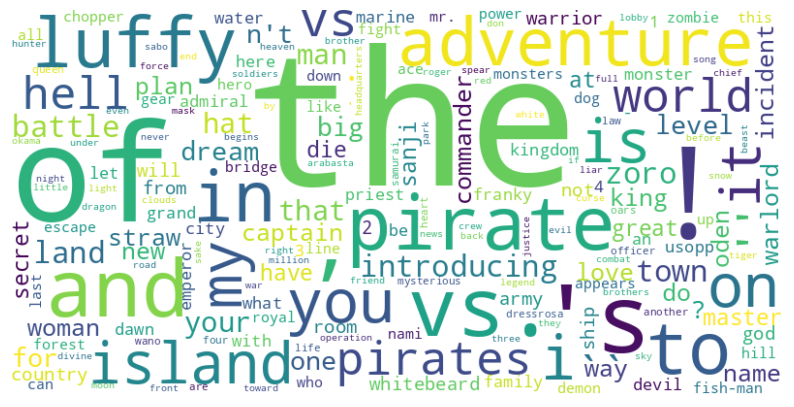

In [30]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el dataset de One Piece
df = pd.read_csv("/content/drive/MyDrive/Mineria de datos/onepiece_chapters_modificado.csv")  
# Obtener el texto de los nombres de los capítulos
texto = ' '.join(df['Nombre'])

# Preprocesamiento del texto
texto = texto.lower()  # Convertir el texto a minúsculas
tokens = nltk.word_tokenize(texto)  # Tokenización

# Eliminación de palabras vacías (stop words)
stopwords = set(stopwords.words('spanish'))
tokens = [token for token in tokens if token not in stopwords]

# Recuento de palabras
frecuencia = nltk.FreqDist(tokens)

# Creación de la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia)

# Visualización de la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
